In [1]:
import mne
import numpy as np

In [2]:
filename = "A01T.gdf"
raw = mne.io.read_raw_gdf(filename)

Extracting EDF parameters from /Users/homa/Desktop/MNE-Python Videos/Session5_Raw/Session5-4_Epochs/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [3]:
raw.info

Measurement date,"January 17, 2005 12:00:00 GMT"
Experimenter,Unknown
Participant,A01
Digitized points,Not available
Good channels,25 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.50 Hz
Lowpass,100.00 Hz


In [4]:
events, _=mne.events_from_annotations(raw)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


In [5]:
raw.load_data()

Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


Measurement date,"January 17, 2005 12:00:00 GMT"
Experimenter,Unknown
Participant,A01
Digitized points,Not available
Good channels,25 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.50 Hz
Lowpass,100.00 Hz


In [6]:
#pick channels by type and name
#remove the EOG channels and pick only desired EEG channels

picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False)

In [7]:
picks

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [8]:
raw.info['ch_names']

['EEG-Fz',
 'EEG-0',
 'EEG-1',
 'EEG-2',
 'EEG-3',
 'EEG-4',
 'EEG-5',
 'EEG-C3',
 'EEG-6',
 'EEG-Cz',
 'EEG-7',
 'EEG-C4',
 'EEG-8',
 'EEG-9',
 'EEG-10',
 'EEG-11',
 'EEG-12',
 'EEG-13',
 'EEG-14',
 'EEG-Pz',
 'EEG-15',
 'EEG-16',
 'EOG-left',
 'EOG-central',
 'EOG-right']

In [9]:
#remove the EOG channels and pick only desired EEG channels
raw.info['bads'] += ['EOG-left', 'EOG-central', 'EOG-right']
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False)

In [10]:
picks

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [11]:
event_id = dict({'769':7, '770':8, '771':9, '772':10})


In [12]:
event_id

{'769': 7, '770': 8, '771': 9, '772': 10}

In [13]:
type(events)

numpy.ndarray

In [14]:
events.shape

(603, 3)

In [15]:
events

array([[     0,      0,      5],
       [     0,      0,      3],
       [ 29683,      0,      5],
       ...,
       [670550,      0,      6],
       [670550,      0,      1],
       [671050,      0,      7]])

In [16]:
events[:,0]

array([     0,      0,  29683,  29683,  49955,  49955,  91518,  91868,
        92368,  93871,  94371,  95789,  96289,  97741,  98241,  99749,
       100249, 101860, 102360, 103777, 104277, 105827, 106327, 107758,
       108258, 109756, 110256, 111662, 112162, 113557, 114057, 115529,
       116029, 117473, 117973, 119440, 119940, 121560, 122060, 123568,
       124068, 125634, 126134, 127670, 128170, 129736, 130236, 131806,
       132306, 133886, 133886, 134386, 135798, 136298, 137829, 138329,
       139782, 140282, 141743, 142243, 143847, 144347, 145851, 146351,
       147826, 148326, 149852, 150352, 151923, 152423, 154030, 154530,
       156122, 156622, 158213, 158713, 160256, 160756, 162320, 162820,
       164340, 164840, 166312, 166812, 168275, 168775, 170200, 170700,
       172281, 172781, 174259, 174759, 176249, 176749, 178368, 178868,
       180274, 180774, 182202, 182202, 182702, 184316, 184816, 186375,
       186875, 188353, 188703, 189203, 190706, 191206, 192624, 193124,
      

In [17]:
events[:,2]

array([ 5,  3,  5,  4,  5,  2,  5,  6, 10,  6,  9,  6,  8,  6,  7,  6,  7,
        6,  8,  6,  9,  6, 10,  6,  8,  6,  9,  6,  7,  6,  7,  6,  7,  6,
       10,  6,  8,  6,  8,  6,  7,  6,  7,  6,  9,  6,  7,  6,  8,  6,  1,
       10,  6, 10,  6,  9,  6,  7,  6, 10,  6, 10,  6,  8,  6, 10,  6, 10,
        6,  8,  6,  7,  6,  8,  6,  9,  6,  9,  6,  9,  6, 10,  6,  9,  6,
        7,  6, 10,  6,  8,  6,  9,  6,  8,  6,  9,  6, 10,  6,  1,  8,  6,
        9,  6,  7,  5,  6,  7,  6,  7,  6, 10,  6,  8,  6,  1,  7,  6,  9,
        6,  7,  6,  9,  6,  1,  8,  6, 10,  6,  7,  6,  9,  6,  9,  6,  7,
        6,  9,  6,  8,  6, 10,  6, 10,  6, 10,  6,  1,  9,  6,  7,  6, 10,
        6,  8,  6, 10,  6,  8,  6,  7,  6,  9,  6,  8,  6,  7,  6,  9,  6,
        9,  6,  7,  6,  9,  6, 10,  6, 10,  6,  8,  6,  7,  6,  8,  6, 10,
        6,  8,  6, 10,  6,  9,  6,  8,  6,  8,  6,  8,  6,  9,  6,  1, 10,
        6,  7,  5,  6,  8,  6,  1, 10,  6,  1,  7,  6,  9,  6,  9,  6, 10,
        6,  7,  6,  7,  6

In [18]:
#left_hand=769(7), right_hand=770(8), foot=771(9), tongue=772(10)
tmin, tmax = 3.5, 6.5
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks, baseline=None, preload=True)


Not setting metadata
288 matching events found


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 751 original time points ...
1 bad epochs dropped


In [19]:
type(epochs)

mne.epochs.Epochs

In [20]:
print(epochs)

<Epochs |  287 events (all good), 3.5 – 6.5 s, baseline off, ~36.2 MB, data loaded,
 '769': 71
 '770': 72
 '771': 72
 '772': 72>


In [21]:
epochs.event_id

{'769': 7, '770': 8, '771': 9, '772': 10}

Subselecting Epochs

In [22]:
#left_hand=769(7), right_hand=770(8), foot=771(9), tongue=772(10)
left_hand = epochs["769"]
right_hand = epochs["770"]
foot = epochs["771"]
tongue = epochs["772"]

In [23]:
left_hand

Number of events,71
Events,769: 71
Time range,3.500 – 6.500 s
Baseline,off


Selecting epochs by index

In [24]:
print(epochs[:10]) #extracting epochs 0-9

<Epochs |  10 events (all good), 3.5 – 6.5 s, baseline off, ~1.3 MB, data loaded,
 '769': 2
 '770': 3
 '771': 3
 '772': 2>


In [25]:
print(epochs[1:8:2]) #epochs 1, 3, 5, 7

<Epochs |  4 events (all good), 3.5 – 6.5 s, baseline off, ~538 kB, data loaded,
 '769': 1
 '770': 1
 '771': 1
 '772': 1>


In [26]:
print(epochs["769"][:4])  #first 4 "left hand" epochs

<Epochs |  4 events (all good), 3.5 – 6.5 s, baseline off, ~538 kB, data loaded,
 '769': 4>


In [27]:
print(epochs["769"][[0, 11, 21, 32]])

<Epochs |  4 events (all good), 3.5 – 6.5 s, baseline off, ~538 kB, data loaded,
 '769': 4>


In [28]:
epochs_eeg = epochs.copy().pick(picks="eeg")
print(epochs_eeg.ch_names)

['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']


In [29]:
#changing channel name and type

epochs.set_channel_types({"EEG-0":"eeg", "EEG-1":"eeg"})

Number of events,287
Events,769: 71770: 72771: 72772: 72
Time range,3.500 – 6.500 s
Baseline,off


In [30]:
shorter_epochs = epochs.copy().crop(tmin=3.5, tmax=3.6)

In [31]:
shorter_epochs

Number of events,287
Events,769: 71770: 72771: 72772: 72
Time range,3.500 – 3.600 s
Baseline,off


Extracting data from specific channels

In [32]:
channels_4_9_6 = epochs.get_data(picks=slice(4,9,2))

In [33]:
channels_4_9_6 

array([[[-1.23535156e-05, -1.54785156e-05, -1.58203125e-05, ...,
         -3.27148437e-06, -7.86132812e-06, -1.04003906e-05],
        [-6.93359375e-06, -5.76171875e-06, -4.00390625e-06, ...,
         -2.78320312e-06, -2.14843750e-06, -1.22070313e-06],
        [-1.08886719e-05, -1.07910156e-05, -8.74023437e-06, ...,
         -6.73828125e-06, -8.83789062e-06, -9.32617187e-06]],

       [[ 8.44726562e-06,  7.27539063e-06,  5.27343750e-06, ...,
          6.78710937e-06,  5.17578125e-06,  1.50878906e-05],
        [ 2.73437500e-06, -2.29492188e-06, -1.22070313e-06, ...,
          7.56835937e-06,  7.27539063e-06,  1.32812500e-05],
        [ 2.34375000e-06, -2.00195312e-06, -1.31835937e-06, ...,
          1.05957031e-05,  9.52148437e-06,  1.85546875e-05]],

       [[ 8.88671875e-06,  4.39453125e-06,  4.73632813e-06, ...,
         -9.13085937e-06, -1.14746094e-05, -1.12304687e-05],
        [ 1.16210937e-05,  7.91015625e-06,  1.20117188e-05, ...,
         -1.85546875e-06, -1.95312500e-06, -2.539

In [34]:
#Converting Epochs to a dataframe

df = epochs.to_data_frame()

In [35]:
df

,time,condition,epoch,EEG-Fz,EEG-0,EEG-1,EEG-2,EEG-3,EEG-4,EEG-5,...,EEG-8,EEG-9,EEG-10,EEG-11,EEG-12,EEG-13,EEG-14,EEG-Pz,EEG-15,EEG-16
0,3.500,772,8,-14.599609,-16.601562,-15.527344,-17.480469,-12.353516,-12.207031,-6.933594,...,-1.171875,-13.037109,-11.718750,-14.404297,-11.572266,-7.421875,-14.306641,-13.574219,-12.451172,-15.429687
1,3.504,772,8,-16.406250,-16.308594,-16.357422,-19.140625,-15.478516,-18.554688,-5.761719,...,-8.984375,-12.597656,-10.742188,-14.160156,-11.523438,-9.179688,-10.742188,-10.546875,-10.937500,-11.474609
2,3.508,772,8,-15.039062,-10.058594,-14.013672,-11.865234,-15.820312,-13.281250,-4.003906,...,-7.373047,-3.076172,-7.617188,-5.273437,-8.251953,-6.152344,-4.589844,-5.078125,-5.468750,-5.517578
3,3.512,772,8,-12.646484,-9.863281,-10.449219,-13.281250,-13.867187,-17.382812,-3.271484,...,-8.789062,-6.201172,-6.152344,-7.910156,-9.716797,-8.593750,-6.689453,-6.884766,-8.447266,-8.886719
4,3.516,772,8,-8.203125,-4.931641,-3.466797,-7.568359,-8.496094,-10.693359,-1.513672,...,-0.390625,-2.001953,-0.341797,-2.294922,-2.929688,-1.806641,-1.806641,-2.539062,-3.564453,-5.859375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215532,6.484,770,599,14.794922,14.501953,15.478516,14.501953,12.939453,11.425781,9.130859,...,4.345703,17.626953,18.603516,18.164062,11.181641,6.738281,15.673828,15.136719,11.474609,11.718750
215533,6.488,770,599,9.228516,6.347656,7.763672,6.445312,6.396484,4.785156,5.468750,...,1.318359,9.619141,12.060547,8.642578,4.931641,0.683594,10.400391,8.642578,5.566406,6.445312
215534,6.492,770,599,10.546875,5.078125,6.835937,7.763672,8.447266,9.619141,7.324219,...,3.710938,12.695312,12.158203,9.863281,5.419922,3.125000,11.914062,10.791016,7.666016,9.179688
215535,6.496,770,599,7.177734,-0.244141,2.783203,3.320312,5.029297,5.175781,3.906250,...,1.171875,8.056641,7.666016,7.031250,4.687500,1.855469,9.521484,8.056641,6.787109,7.812500


In [37]:
df = epochs.to_data_frame(index = ["condition", "epoch", "time"])
df

channel                   EEG-Fz      EEG-0      EEG-1      EEG-2      EEG-3  \
condition epoch time                                                           
772       8     3.500 -14.599609 -16.601562 -15.527344 -17.480469 -12.353516   
                3.504 -16.406250 -16.308594 -16.357422 -19.140625 -15.478516   
                3.508 -15.039062 -10.058594 -14.013672 -11.865234 -15.820312   
                3.512 -12.646484  -9.863281 -10.449219 -13.281250 -13.867187   
                3.516  -8.203125  -4.931641  -3.466797  -7.568359  -8.496094   
...                          ...        ...        ...        ...        ...   
770       599   6.484  14.794922  14.501953  15.478516  14.501953  12.939453   
                6.488   9.228516   6.347656   7.763672   6.445312   6.396484   
                6.492  10.546875   5.078125   6.835937   7.763672   8.447266   
                6.496   7.177734  -0.244141   2.783203   3.320312   5.029297   
                6.500   3.271484  -0.732422  -1.904297   1.074219   0.537109   

channel                    EEG-4     EEG-5     EEG-C3      EEG-6     EEG-Cz  \
condition epoch time                                                          
772       8     3.500 -12.207031 -6.933594 -12.890625 -10.888672 -15.673828   
                3.504 -18.554688 -5.761719 -11.181641 -10.791016 -15.966797   
                3.508 -13.281250 -4.003906  -4.638672  -8.740234  -9.814453   
                3.512 -17.382812 -3.271484  -6.005859  -5.615234 -12.451172   
                3.516 -10.693359 -1.513672  -1.074219   1.367188  -4.882812   
...                          ...       ...        ...        ...        ...   
770       599   6.484  11.425781  9.130859  16.943359  17.236328  16.455078   
                6.488   4.785156  5.468750  10.644531   9.765625   6.738281   
                6.492   9.619141  7.324219  10.009766   8.300781   6.689453   
                6.496   5.175781  3.906250   4.931641   3.662109   2.587891   
                6.500   3.857422  3.222656   4.638672  -1.025391   0.146484   

channel                ...     EEG-8      EEG-9     EEG-10     EEG-11  \
condition epoch time   ...                                              
772       8     3.500  ... -1.171875 -13.037109 -11.718750 -14.404297   
                3.504  ... -8.984375 -12.597656 -10.742188 -14.160156   
                3.508  ... -7.373047  -3.076172  -7.617188  -5.273437   
                3.512  ... -8.789062  -6.201172  -6.152344  -7.910156   
                3.516  ... -0.390625  -2.001953  -0.341797  -2.294922   
...                    ...       ...        ...        ...        ...   
770       599   6.484  ...  4.345703  17.626953  18.603516  18.164062   
                6.488  ...  1.318359   9.619141  12.060547   8.642578   
                6.492  ...  3.710938  12.695312  12.158203   9.863281   
                6.496  ...  1.171875   8.056641   7.666016   7.031250   
                6.500  ... -0.292969   7.373047   3.515625   5.224609   

channel                   EEG-12    EEG-13     EEG-14     EEG-Pz     EEG-15  \
condition epoch time                                                          
772       8     3.500 -11.572266 -7.421875 -14.306641 -13.574219 -12.451172   
                3.504 -11.523438 -9.179688 -10.742188 -10.546875 -10.937500   
                3.508  -8.251953 -6.152344  -4.589844  -5.078125  -5.468750   
                3.512  -9.716797 -8.593750  -6.689453  -6.884766  -8.447266   
                3.516  -2.929688 -1.806641  -1.806641  -2.539062  -3.564453   
...                          ...       ...        ...        ...        ...   
770       599   6.484  11.181641  6.738281  15.673828  15.136719  11.474609   
                6.488   4.931641  0.683594  10.400391   8.642578   5.566406   
                6.492   5.419922  3.125000  11.914062  10.791016   7.666016   
                6.496   4.687500  1.855469   9.521484   8.056641   6.787109   
                6.500   0.585938 

Loading and Saving Epochs objects to disk

In [38]:
epochs.save("epochs_BCICIV_2a.gdf")

/var/folders/cg/hf20p26j01s98fjg6k6hvn9c0000gn/T/ipykernel_1384/496503750.py:1: RuntimeWarning: This filename (epochs_BCICIV_2a.gdf) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save("epochs_BCICIV_2a.gdf")


In [39]:
epochs.save("epochs_BCICIV_2a.fif")

/var/folders/cg/hf20p26j01s98fjg6k6hvn9c0000gn/T/ipykernel_1384/3872649859.py:1: RuntimeWarning: This filename (epochs_BCICIV_2a.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save("epochs_BCICIV_2a.fif")


In [40]:
epochs_from_file = mne.read_epochs("epochs_BCICIV_2a.gdf")

Reading /Users/homa/Desktop/MNE-Python Videos/Session5_Raw/Session5-4_Epochs/epochs_BCICIV_2a.gdf ...
Isotrak not found
    Found the data of interest:
        t =    3500.00 ...    6500.00 ms
        0 CTF compensation matrices available
Not setting metadata
287 matching events found
No baseline correction applied
0 projection items activated


/var/folders/cg/hf20p26j01s98fjg6k6hvn9c0000gn/T/ipykernel_1384/85132282.py:1: RuntimeWarning: This filename (epochs_BCICIV_2a.gdf) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_from_file = mne.read_epochs("epochs_BCICIV_2a.gdf")


In [41]:
epochs_from_file

Number of events,287
Events,769: 71770: 72771: 72772: 72
Time range,3.500 – 6.500 s
Baseline,off


In [42]:
type(epochs_from_file)

mne.epochs.EpochsFIF

Iterating over Epochs

In [43]:
for epoch in epochs[:4]:
    print(type(epoch))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [44]:
#Iterating over Epochs by Index
for index in range(4):
    print(type(epochs[index]))

<class 'mne.epochs.Epochs'>
<class 'mne.epochs.Epochs'>
<class 'mne.epochs.Epochs'>
<class 'mne.epochs.Epochs'>


Visualizing epoched data

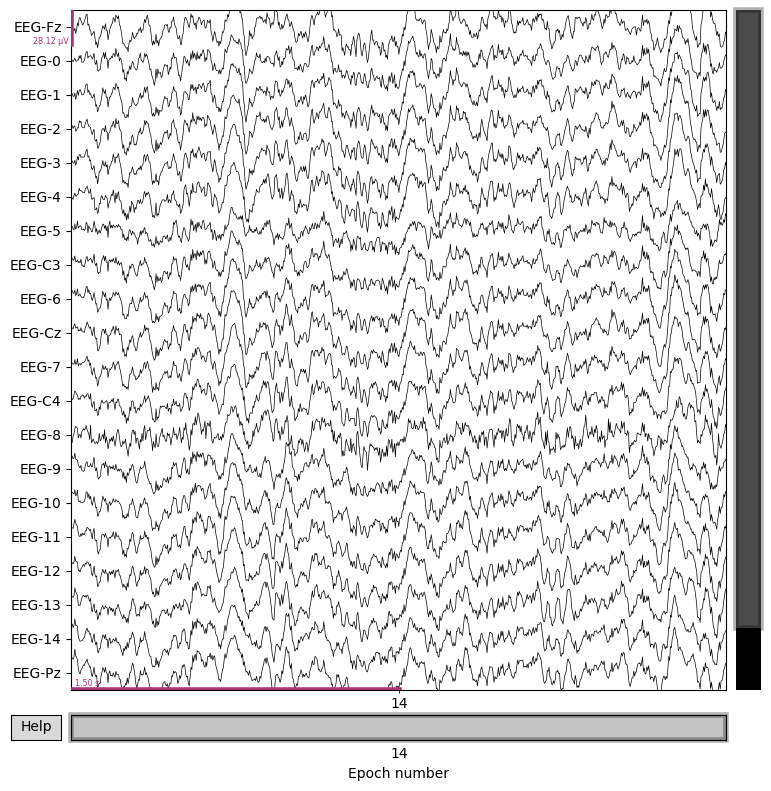

In [46]:
import matplotlib.pyplot as plt
left_hand[0].plot(scalings="auto")
plt.show()

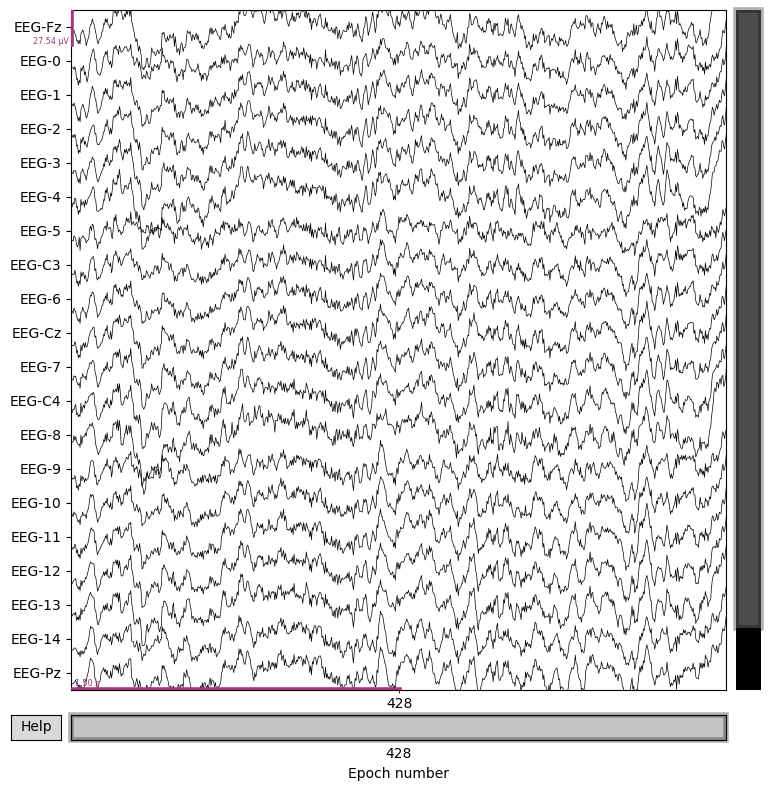

In [47]:
import matplotlib.pyplot as plt
right_hand[50].plot(scalings="auto")
plt.show()

Plotting sensor location

In [52]:
filename = "0-raw.fif"
raw = mne.io.read_raw_fif(filename)

Opening raw data file 0-raw.fif...
    Range : 0 ... 1672749 =      0.000 ...  6690.996 secs
Ready.


In [53]:
events, _ = mne.events_from_annotations(raw)

Used Annotations descriptions: ['feet', 'left_hand', 'rest', 'right_hand']


In [54]:
raw.load_data()

Reading 0 ... 1672749  =      0.000 ...  6690.996 secs...


Measurement date,"February 03, 2022 18:12:53 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,131 points
Good channels,8 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,1.00 Hz
Lowpass,40.00 Hz


In [55]:
picks = mne.pick_types(raw.info, eeg=True, meg=False, eog=False, stim=False)

In [56]:
tmin, tmax= 0., 4.
event_id = dict(left_hand=1, right_hand=2, feet=3, rest=4)
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks, baseline=None, preload=True)


Not setting metadata
880 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 880 events and 1001 original time points ...
0 bad epochs dropped


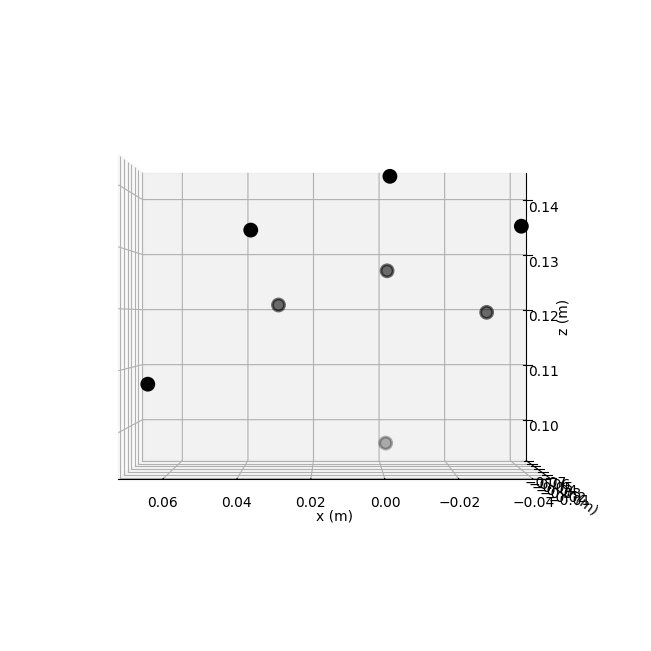

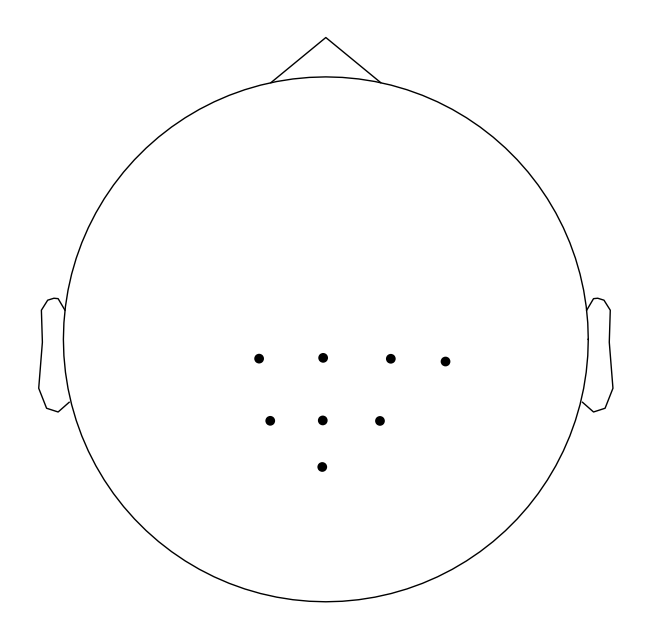

In [57]:
epochs.plot_sensors(kind="3d", ch_type="all")
epochs.plot_sensors(kind="topomap", ch_type="all")
plt.show()

Plotting the power spectrum density of Epochs

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


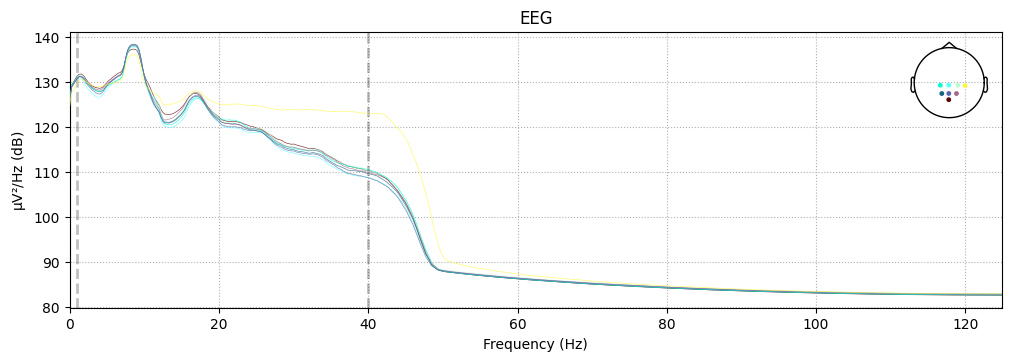

In [58]:
epochs["left_hand"].compute_psd().plot(picks="eeg")
plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


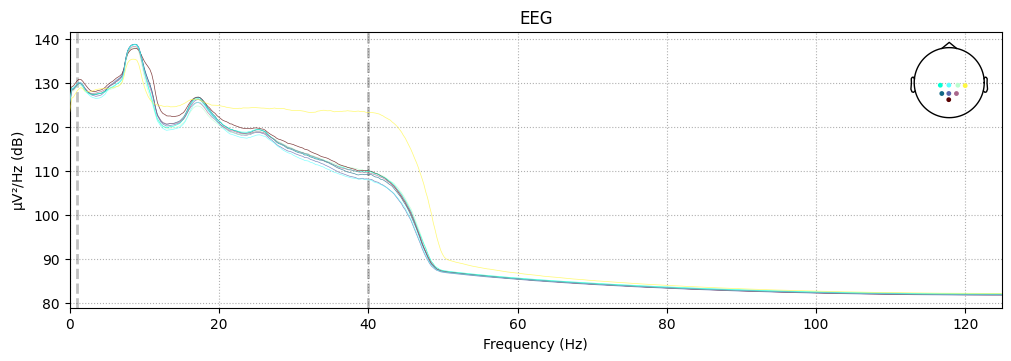

In [59]:
epochs["right_hand"].compute_psd().plot(picks="eeg")
plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows


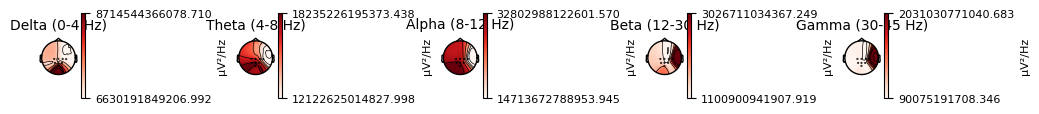

In [60]:
spectrum = epochs["right_hand"].compute_psd()
spectrum.plot_topomap()
plt.show()

Plotting Epochs as an image map

Not setting metadata
220 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


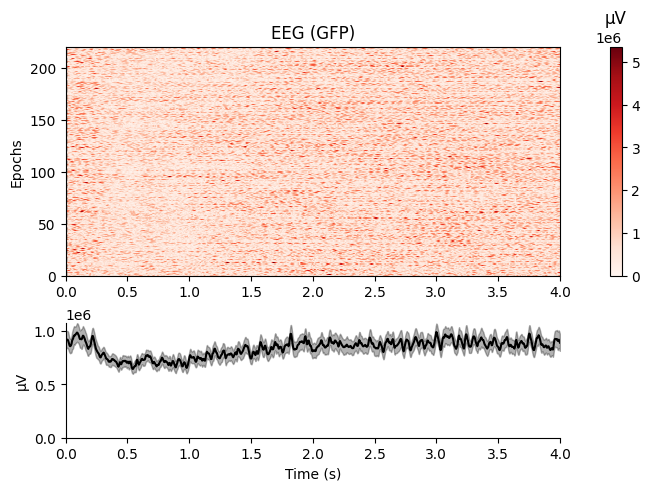

[<Figure size 640x480 with 3 Axes>]

In [61]:
epochs["left_hand"].plot_image(picks="eeg")

Not setting metadata
220 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
220 matching events found
No baseline correction applied
0 projection items activated


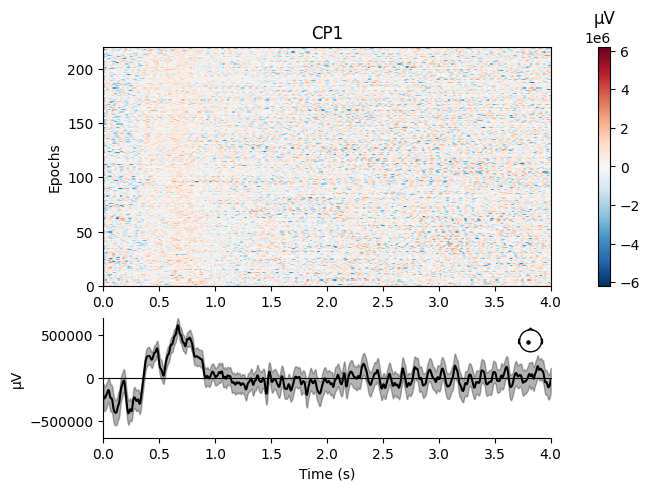

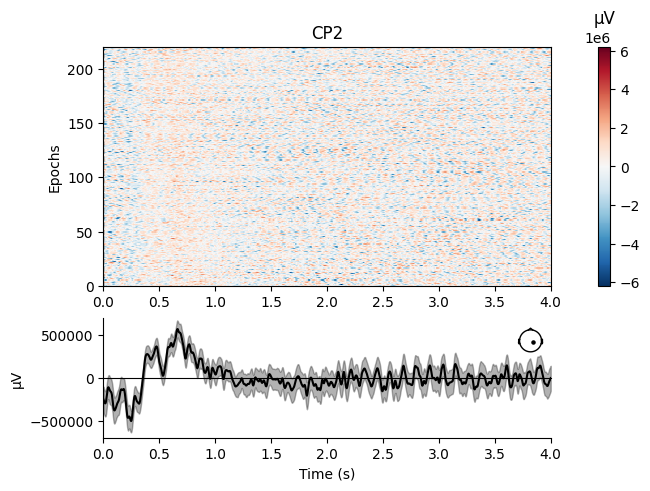

[<Figure size 640x480 with 4 Axes>, <Figure size 640x480 with 4 Axes>]

In [63]:
epochs["left_hand"].plot_image(picks=["CP1", "CP2"])

In [64]:
df = epochs.to_data_frame()
df

,time,condition,epoch,CP1,CP2,Pz,POz,CPz,CP4,P1,P2
0,0.000,rest,0,-267926.126719,226353.138685,-187174.186110,-251823.335886,-224165.260792,1.139437e+06,-450278.431177,189394.980669
1,0.004,rest,0,-301486.611366,1089.113182,-359893.769026,-502198.040485,-472574.204206,1.085070e+06,-561074.554920,-61989.072710
2,0.008,rest,0,-265452.861786,-235947.117209,-480345.249176,-677046.835423,-607368.648052,9.046215e+05,-589675.307274,-276212.751865
3,0.012,rest,0,-230070.933700,-352265.417576,-510990.202427,-784044.921398,-581392.407417,6.524987e+05,-574932.575226,-348010.152578
4,0.016,rest,0,-213508.740067,-318930.864334,-445825.845003,-833726.942539,-423222.839832,4.200866e+05,-543597.877026,-280564.904213
...,...,...,...,...,...,...,...,...,...,...,...
880875,3.984,left_hand,879,173038.840294,701428.949833,350864.440203,836544.990540,293227.493763,2.717861e+05,283834.606409,870648.860931
880876,3.988,left_hand,879,196180.135012,688504.815102,367431.610823,719565.808773,454596.757889,-2.856897e+05,302039.533854,850686.609745
880877,3.992,left_hand,879,274103.909731,541492.044926,392540.484667,614164.888859,546483.576298,-5.347312e+05,346802.264452,743445.515633
880878,3.996,left_hand,879,381612.211466,271892.786026,426324.903965,577823.579311,538317.084312,-5.123278e+05,416239.053011,568775.951862


In [65]:
long_df = epochs.to_data_frame(long_format=True)
long_df.head()

Converting "condition" to "category"...
Converting "epoch" to "category"...
Converting "channel" to "category"...
Converting "ch_type" to "category"...


,condition,epoch,time,channel,ch_type,value
0,rest,0,0.0,CP1,eeg,-267926.126719
1,rest,0,0.0,CP2,eeg,226353.138685
2,rest,0,0.0,Pz,eeg,-187174.186110
3,rest,0,0.0,POz,eeg,-251823.335886
4,rest,0,0.0,CPz,eeg,-224165.260792
